In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = 'C:\\Users\\vsdha\\ipnby\\cat_and_dog\\cats_and_dogs\\cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [4]:
# 3
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                          directory = validation_dir,
                                          target_size = (IMG_HEIGHT,IMG_WIDTH),
                                          class_mode = 'binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory = PATH,classes =['test'],
                                                         target_size = (IMG_HEIGHT,IMG_WIDTH),
                                                         class_mode = 'binary',
                                                         shuffle = False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


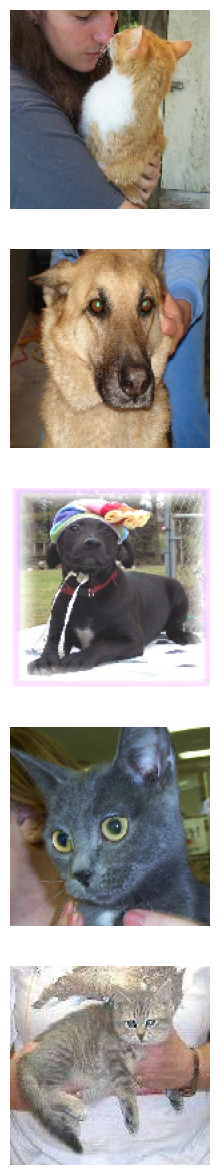

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [6]:
# 5
train_image_generator = ImageDataGenerator(rescale=1/255,
                                           horizontal_flip=True,
                                           vertical_flip=True,
                                           rotation_range = 90,
                                           shear_range=0.5)


Found 2000 images belonging to 2 classes.


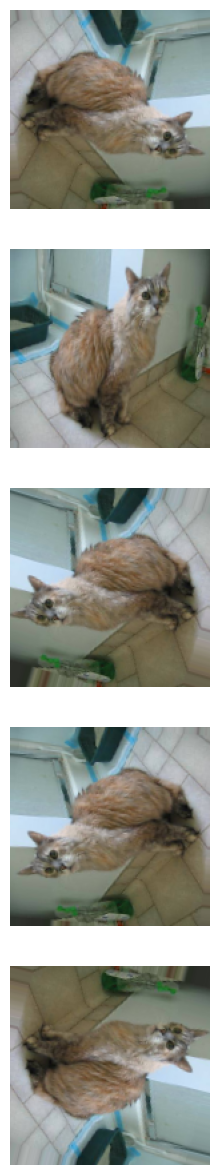

In [7]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
# 7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\vsdha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,327,937 (20.32 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# 8
history = model.fit(train_data_gen, 
                    steps_per_epoch=total_train//batch_size,
                    epochs = epochs,
                    validation_data = val_data_gen,
                    validation_steps = total_val//batch_size
                    )
                    

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 927ms/step - accuracy: 0.6888 - loss: 0.6134 - val_accuracy: 0.6886 - val_loss: 0.5816
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7109 - loss: 0.5622 - val_accuracy: 0.6731 - val_loss: 0.5484
Epoch 3/15


c:\Users\vsdha\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 935ms/step - accuracy: 0.6946 - loss: 0.5810 - val_accuracy: 0.6596 - val_loss: 0.5942
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6641 - loss: 0.5981 - val_accuracy: 0.6731 - val_loss: 0.5948
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 903ms/step - accuracy: 0.7146 - loss: 0.5649 - val_accuracy: 0.7121 - val_loss: 0.5497
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6797 - loss: 0.5896 - val_accuracy: 0.6154 - val_loss: 0.6323
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 895ms/step - accuracy: 0.7199 - loss: 0.5633 - val_accuracy: 0.6920 - val_loss: 0.5835
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7188 - loss: 0.5513 - val_accuracy: 0.7404 - val_loss: 0.5113
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 909ms/step - accuracy: 0.7248 - loss: 0.5447 - val_accuracy: 0.6975 - val_loss: 0.5562
Epoch 10/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7000 - loss: 0.6410 - val_accuracy: 0.6827 - val

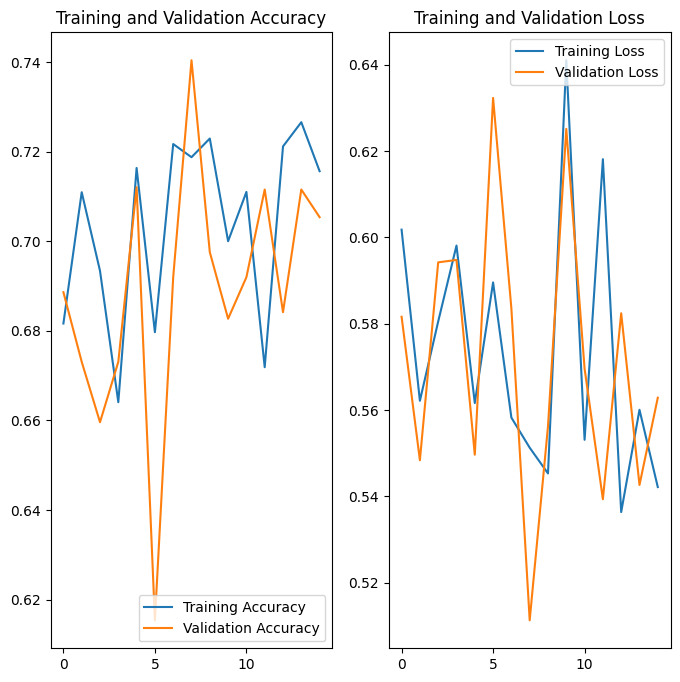

In [36]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


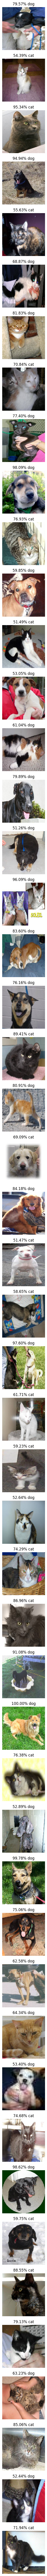

In [37]:
prediction = model.predict(test_data_gen)
probabilities = [i[0] for i in prediction]
test_images, _ = next(test_data_gen)
plotImages(test_images,probabilities=probabilities)

In [38]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2) * 100}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
